In [ ]:
#!pip install kagglehub pandas numpy matplotlib seaborn

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3


In [ ]:
import os
print("Files in the dataset folder:", os.listdir(path))

Files in the dataset folder: ['New_York_City_.png', 'AB_NYC_2019.csv']


In [ ]:
file_path = f"{path}/AB_NYC_2019.csv"  # Replace with the actual file name if different
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [ ]:
print("Original Dataset:")
print(df.head())

Original Dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1     

In [ ]:
print("\nMissing Data Summary:")
print(df.isnull().sum())


Missing Data Summary:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1

In [ ]:
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

<ipython-input-9-555c353eb638>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
<ipython-input-9-555c353eb638>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
df.dropna(subset=['latitude', 'longitude', 'price'], inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['name'] = df['name'].str.title()
df['host_name'] = df['host_name'].str.title()

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])


In [ ]:
print("\nCleaned Dataset Summary:")
print(df.info())
print(df.head())


Cleaned Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_r

In [ ]:
cleaned_file_path = "/content/Cleaned_AB_NYC_2019.csv"  # Path in Google Colab
df.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved to:", cleaned_file_path)

Cleaned dataset saved to: /content/Cleaned_AB_NYC_2019.csv


In [ ]:
#from google.colab import files
#files.download(cleaned_file_path)

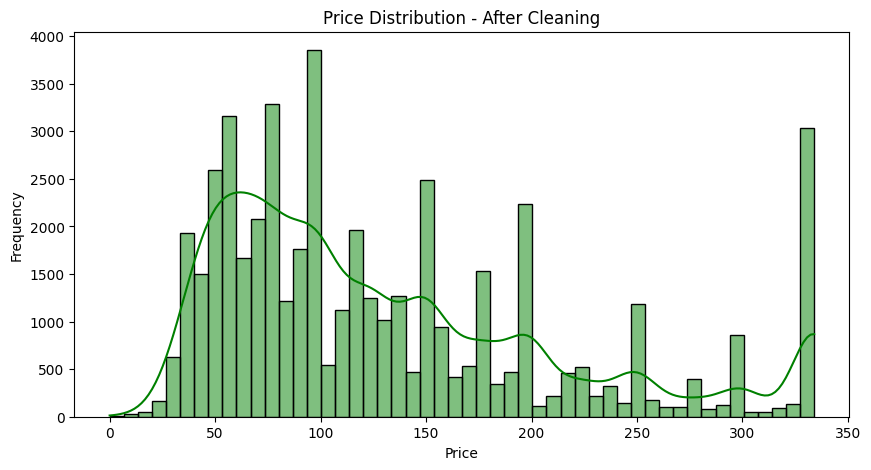

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=50, color="green")
plt.title("Price Distribution - After Cleaning")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
